<a href="https://colab.research.google.com/github/tanyach08/human-burn-classification/blob/main/vitmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="3VTqHbHMikPHRoA3WTmB")
project = rf.workspace("aibuildersclub").project("skin-burns-4yoo2")
version = project.version(3)
dataset = version.download("yolov5")


ModuleNotFoundError: No module named 'roboflow'

In [ ]:
import os
import shutil

image_folder = '/content/Skin-Burn-1/train/images'
annotation_folder = '/content/Skin-Burn-1/train/labels'
output_folder = '/content/Skin-Burns-1/train1'

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(annotation_folder):
    if filename.endswith('.txt'):
        with open(os.path.join(annotation_folder, filename), 'r') as file:
            line = file.readline().strip()
            class_label, xmin, ymin, xmax, ymax = map(float, line.split())

            class_folder = os.path.join(output_folder, str(int(class_label)))
            os.makedirs(class_folder, exist_ok=True)

            image_name = os.path.splitext(filename)[0] + '.jpg'
            shutil.copyfile(os.path.join(image_folder, image_name),
                            os.path.join(class_folder, image_name))

In [ ]:
import os
import shutil

image_folder = '/content/Skin-Burn-1/valid/images'
annotation_folder = '/content/Skin-Burn-1/valid/labels'
output_folder = '/content/Skin-Burns-1/valid1'

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(annotation_folder):
    if filename.endswith('.txt'):
        with open(os.path.join(annotation_folder, filename), 'r') as file:
            line = file.readline().strip()
            class_label, xmin, ymin, xmax, ymax = map(float, line.split())

            class_folder = os.path.join(output_folder, str(int(class_label)))
            os.makedirs(class_folder, exist_ok=True)

            image_name = os.path.splitext(filename)[0] + '.jpg'
            shutil.copyfile(os.path.join(image_folder, image_name),
                            os.path.join(class_folder, image_name))

In [ ]:
import os
import shutil

image_folder = '/content/Skin-Burn-1/test/images'
annotation_folder = '/content/Skin-Burn-1/test/labels'
output_folder = '/content/Skin-Burns-1/test1'

os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(annotation_folder):
    if filename.endswith('.txt'):
        with open(os.path.join(annotation_folder, filename), 'r') as file:
            line = file.readline().strip()
            class_label, xmin, ymin, xmax, ymax = map(float, line.split())

            class_folder = os.path.join(output_folder, str(int(class_label)))
            os.makedirs(class_folder, exist_ok=True)

            image_name = os.path.splitext(filename)[0] + '.jpg'
            shutil.copyfile(os.path.join(image_folder, image_name),
                            os.path.join(class_folder, image_name))

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

dataset_folder = '/content/Skin-Burns-1'
output_folder = '/content/Skin-Burns-1'
target_size = (224, 224)

os.makedirs(output_folder, exist_ok=True)

def resize_image(image_path, output_path, target_size):
    with Image.open(image_path) as img:
        resized_img = img.resize(target_size)
        resized_img.save(output_path)
for folder in ['train1', 'test1', 'valid1']:
    folder_path = os.path.join(dataset_folder, folder)
    if os.path.isdir(folder_path):
        output_folder_path = os.path.join(output_folder, folder)
        os.makedirs(output_folder_path, exist_ok=True)

        for class_folder in os.listdir(folder_path):
            class_path = os.path.join(folder_path, class_folder)
            if os.path.isdir(class_path):
                output_class_folder = os.path.join(output_folder_path, class_folder)
                os.makedirs(output_class_folder, exist_ok=True)
                for image_name in os.listdir(class_path):
                    image_path = os.path.join(class_path, image_name)
                    output_image_path = os.path.join(output_class_folder, image_name)
                    resize_image(image_path, output_image_path, target_size)

In [ ]:
#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = '/content/Skin-Burns-1/train1'
valid_dir = '/content/Skin-Burns-1/valid1'
test_dir = '/content/Skin-Burns-1/test1'

img_size = (224, 224)
batch_size = 32

# Create ImageDataGenerator with augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=90,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.75, 1.25],
    channel_shift_range=0.25,
    fill_mode='nearest'
)

# Create ImageDataGenerator without augmentation for the validation and test sets
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 756 images belonging to 3 classes.
Found 223 images belonging to 3 classes.
Found 112 images belonging to 3 classes.


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as L

import glob, random, os, warnings
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print('TensorFlow Version ' + tf.__version__)

def seed_everything(seed = 0):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'

seed_everything()

import warnings

TensorFlow Version 2.15.0


In [ ]:
image_size = 224
batch_size = 32
n_classes = 3
EPOCHS = 20

train_path = '/content/Skin-Burns-1/train1'
valid_path='/content/Skin-Burns-1/valid1'

classes = {1 : "0",
           2 : "1",
           3 : "2"}

In [ ]:
def data_augment(image):
    p_spatial = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_rotate = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_1 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_2 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)
    p_pixel_3 = tf.random.uniform([], 0, 1.0, dtype = tf.float32)

    # Flips
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)

    if p_spatial > .75:
        image = tf.image.transpose(image)

    # Rotates
    if p_rotate > .75:
        image = tf.image.rot90(image, k = 3) # rotate 270º
    elif p_rotate > .5:
        image = tf.image.rot90(image, k = 2) # rotate 180º
    elif p_rotate > .25:
        image = tf.image.rot90(image, k = 1) # rotate 90º

    # Pixel-level transforms
    if p_pixel_1 >= .4:
        image = tf.image.random_saturation(image, lower = .7, upper = 1.3)
    if p_pixel_2 >= .4:
        image = tf.image.random_contrast(image, lower = .8, upper = 1.2)
    if p_pixel_3 >= .4:
        image = tf.image.random_brightness(image, max_delta = .1)

    return image

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                                          samplewise_center = True,
                                                          samplewise_std_normalization = True,
                                                          validation_split = 0.2,
                                                          preprocessing_function = data_augment)
# set as training data

train_gen  = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size = batch_size,
    seed = 1,
    color_mode = 'rgb',
    shuffle = True,
    class_mode='categorical',
    subset='training')

# same directory as training data

valid_gen  = datagen.flow_from_directory(
    valid_path ,
    target_size=(224, 224),
    batch_size = batch_size,
    seed = 1,
    color_mode = 'rgb',
    shuffle = False,
    class_mode='categorical',
    subset='validation')

Found 606 images belonging to 3 classes.
Found 43 images belonging to 3 classes.


In [ ]:

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

# Load and preprocess images using the data generator
images, labels = train_gen.next()

# Rescale pixel values to the range [0, 255]
images = (images - images.min()) / (images.max() - images.min()) * 255

# Visualize the images
fig, axes = plt.subplots(3, 5, figsize=(10, 10))
axes = axes.flatten()

for img, ax in zip(images, axes):
    # Convert pixel values to the appropriate data type for display
    img = img.astype('uint8')
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


UnimplementedError: {{function_node __wrapped__AdjustContrastv2_device_/job:localhost/replica:0/task:0/device:GPU:0}} A deterministic GPU implementation of AdjustContrastv2 is not currently available. [Op:AdjustContrastv2] name: 

In [ ]:
!pip install vit_keras

In [ ]:
!pip install tensorflow-addons


In [ ]:
from vit_keras import vit

vit_model = vit.vit_b16(
        image_size = image_size,
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 3)

In [ ]:
class Patches(L.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images = images,
            sizes = [1, self.patch_size, self.patch_size, 1],
            strides = [1, self.patch_size, self.patch_size, 1],
            rates = [1, 1, 1, 1],
            padding = 'VALID',
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

Image size: 224 X 224
Patch size: 7 X 7
Patches per image: 1024
Elements per patch: 147


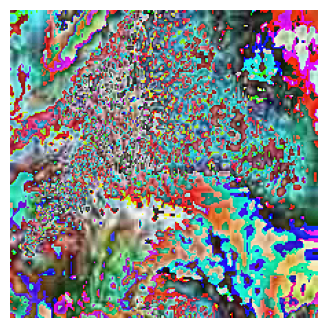

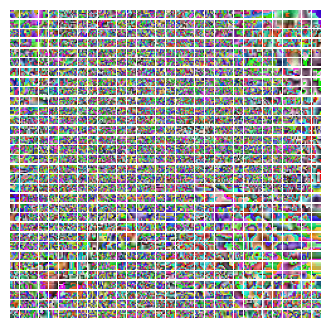

In [ ]:
plt.figure(figsize=(4, 4))
batch_size = 16
patch_size = 7  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2

x = train_gen.next()
image = x[0][0]* 255

plt.imshow(image.astype('uint8'))
plt.axis('off')

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size = (image_size, image_size)
)

patches = Patches(patch_size)(resized_image)
print(f'Image size: {image_size} X {image_size}')
print(f'Patch size: {patch_size} X {patch_size}')
print(f'Patches per image: {patches.shape[1]}')
print(f'Elements per patch: {patches.shape[-1]}')

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))

for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow((patch_img*255).numpy().astype('uint8'))
    plt.axis('off')

In [ ]:
import tensorflow_addons as tfa


model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(128, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(64, activation = tfa.activations.gelu),
        tf.keras.layers.Dense(32, activation = tfa.activations.gelu),
        tf.keras.layers.Dense(3, 'softmax')
    ],
    name = 'vision_transformer')

model.summary()

Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b16 (Functional)        (None, 768)               85798656  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 batch_normalization (Batch  (None, 768)               3072      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               98432     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 64)         

In [ ]:



learning_rate = 1e-4

optimizer = tfa.optimizers.RectifiedAdam(learning_rate = learning_rate)

model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2),
              metrics = ['accuracy'])

STEP_SIZE_TRAIN = train_gen.n // train_gen.batch_size
STEP_SIZE_VALID = valid_gen.n // valid_gen.batch_size



early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(patience = 15, restore_best_weights = True, verbose = 1)

model.fit(x = train_gen,
          steps_per_epoch = STEP_SIZE_TRAIN,
          validation_data = valid_gen,
          validation_steps = STEP_SIZE_VALID,
          epochs = EPOCHS,
          callbacks = early_stopping_callbacks)

Epoch 1/20


KeyboardInterrupt: 

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy*100:.2f}%')

In [ ]:
import matplotlib.pyplot as plt

# Print the keys in the history dictionary
print(history.history.keys())

# Plot the training and validation accuracy
plt.plot(history.history['acc'], color='red', label='train')
plt.plot(history.history['val_acc'], color='blue', label='validation')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

In [ ]:
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)

In [ ]:
g_dict = test_generator.class_indices
classes = list(g_dict.keys())
from sklearn.metrics import confusion_matrix
import itertools

# Confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('')

In [ ]:
test_img.shape

In [ ]:

resized_test_img = cv2.resize(test_img, (150 150))

# Reshaping for prediction
resized_test_input = resized_test_img.reshape((1, 150, 150, 3))

# Making a prediction
prediction_result=model.predict(resized_test_input)
prediction_result

In [ ]:
predicted_class = np.argmax(prediction_result)
predicted_class